<a href="https://colab.research.google.com/github/abdul-rohman-lab/Machine-Learning-for-Marketing-Customer-Segmentation./blob/main/Machine_Learning_for_Marketing__Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Pelanngan

**Tujuan Penentuan Segmentasi Pelanggan untuk Mengoptimalkan Penjualan**

1. Memahami Karakteristik Pelanggan: Mengidentifikasi dan menganalisis karakteristik demografis, perilaku, dan preferensi pelanggan untuk memahami kebutuhan dan keinginan mereka. Dengan pemahaman yang lebih baik tentang siapa pelanggan kita, kita dapat menyesuaikan penawaran produk dan layanan.

2. Meningkatkan Targeting Pemasaran: Menggunakan segmentasi untuk mengembangkan strategi pemasaran yang lebih terfokus dan efektif. Dengan menargetkan segmen pelanggan tertentu, kita dapat meningkatkan relevansi pesan pemasaran dan meningkatkan tingkat respons.

3. Meningkatkan Penjualan dan Profitabilitas: Dengan mengoptimalkan penawaran produk dan strategi pemasaran untuk setiap segmen, kita bertujuan untuk meningkatkan penjualan dan profitabilitas. Segmentasi yang efektif memungkinkan kita untuk mengidentifikasi peluang penjualan silang dan penjualan tambahan.

untuk dataset "Customer Segments" bisa didownload [di sini](https://drive.google.com/file/d/1yA6gRyU4c5S-fHJqBLn3bWUjlWISpGia/view?usp=sharing)

Dataset yang kita gunakan adalah data customer dengan field “Customer ID”, “Nama Pelanggan”,”Jenis Kelamin”,”Umur”, “Profesi”, “Tipe Residen” dan “Nilai Belanja Setahun” dengan tampilan sebagai berikut.

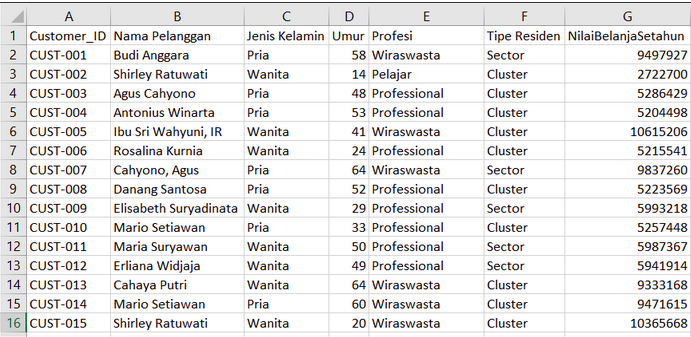

Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:

    - Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
    - Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
    - Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
    - Umur: Umur dari pelanggan dalam format angka
    - Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
    - Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
    - NilaiBelanjaSetahun: Merupakan nilai biaya belanja setahun

Terlihat kalau ada kolom yang berisi angka saja, yaitu Umur dan NilaiBelanjaSetahun. Sisanya diisi data kategori untuku kolom "Jenis Kelamin", "Profesi" dan "Tipe Residen". Sedangkan "Customer ID" dan "Nama Pelanggan" kita anggap memiliki nilai yang unik untuk tiap baris data dan mewakili tiap individu.

Karena kolom "Customer ID" dan "Nama Pelanggan" karena unik maka tidak akan dijadikan variable penentu segmentasi yang kita lakukan, namun sisa kolom lainnya akan digunakan.

Nah dengan contoh dataset inilah, kita akan mencoba mencari jumlah segmentasi yang paling optimal – dimana antar tiap data pelanggan dalam segmen memiliki kemiripan tinggi


**Membaca data dengan fungsi read.csv**

In [ ]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

In [ ]:
pelanggan <- read.csv("customer_segments.txt", sep="\t")
pelanggan
pelanggan[c("Jenis.Kelamin", "Umur", "Profesi", "Tipe.Residen")]

Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206
CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541
CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260
CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569
CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218


Jenis.Kelamin,Umur,Profesi,Tipe.Residen
<chr>,<int>,<chr>,<chr>
Pria,58,Wiraswasta,Sector
Wanita,14,Pelajar,Cluster
Pria,48,Professional,Cluster
Pria,53,Professional,Cluster
Wanita,41,Wiraswasta,Cluster
Wanita,24,Professional,Cluster
Pria,64,Wiraswasta,Sector
Pria,52,Professional,Cluster
Wanita,29,Professional,Sector


`pelanggan <- read.csv("customer_segments.txt", sep="\t")`:

Untuk membaca file customer_segments.txt





`pelanggan[c("Jenis.Kelamin", "Umur", "Profesi", "Tipe.Residen")]`:

Ini adalah cara untuk memilih kolom tertentu dari data frame pelanggan. Dalam hal ini, kita ingin memilih kolom yang disebutkan di dalam tanda kurung.


**Konversi Data dengan data.matrix**

Seperti telah dijelaskan sebelumnya, isi data dari tiga kolom pelanggan yaitu "Jenis.Kelamin", "Profesi" dan "Tipe.Residen" merupakan data kategori yang berupa teks.

Untuk fungsi k-means, ketiga kolom ini tidak bisa digunakan kecuali isi dikonversi menjadi numerik. Salah satu caranya adalah dengan menggunakan fungsi data.matrix.

In [ ]:
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])

**Menggabungkan Hasil Konversi**

In [ ]:
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,5,2
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,3,1
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1,4,1
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1,4,1
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,2,5,1
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,2,4,1


**Menormalisasikan Nilai Belanja**

Kali ini kita perhatikan kolom "NilaiBelanjaSetahun" isi datanya bernilai jutaan. Ketika kolom ini digunakan untuk clustering, perhitungan sum of squared errors (pada bab kmeans) akan menjadi sangat besar.

Kita akan menormalisasikan nilainya agar perhitungan lebih sederhana dan mudah dicerna, namun tidak mengurangi akurasi. Ini terutama akan sangat bermanfaat jika jumlah data sangat banyak, misalkan memiliki 200 ribu data.

Normalisasi bisa dilakukan dengan banyak cara. Untuk kasus kita, cukup dengan pembagian sehingga nilai jutaan menjadi puluhan.

In [ ]:
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000

`pelanggan$NilaiBelanjaSetahun:`

- Ini adalah cara untuk mengakses kolom `NilaiBelanjaSetahun` dari data frame pelanggan. Dalam R, tanda `$` digunakan untuk merujuk ke kolom tertentu dalam data frame. Jadi,
-`pelanggan$NilaiBelanjaSetahun` akan memberikan akses ke semua nilai dalam kolom NilaiBelanjaSetahun.

`pelanggan$NilaiBelanjaSetahun / 1000000:`

Di sini, kita membagi setiap nilai dalam kolom NilaiBelanjaSetahun dengan 1.000.000. Ini biasanya dilakukan untuk mengubah satuan dari nilai belanja tahunan. Misalnya, jika nilai belanja awalnya dalam satuan rupiah, membagi dengan 1.000.000 akan mengubahnya menjadi satuan juta rupiah.

`<-:`

Tanda ini adalah operator penugasan dalam R. Ini berarti bahwa hasil dari operasi di sebelah kanan (yaitu, `pelanggan$NilaiBelanjaSetahun / 1000000)` akan disimpan kembali ke dalam kolom `NilaiBelanjaSetahun` di data frame `pelanggan`. Dengan kata lain, kita memperbarui kolom tersebut dengan nilai baru yang telah dibagi.

**Membuat Data Master**

Setelah penggabungan data, kita jadi mengetahui sebenarnya teks kategori dikonversi menjadi angka numerik berapa.

In [ ]:
Profesi <- unique(pelanggan[c("Profesi", "Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin", "Jenis.Kelamin.1")])
Tipe.Residen <- unique(pelanggan[c("Tipe.Residen", "Tipe.Residen.1")])

print(Profesi)

            Profesi Profesi.1
1        Wiraswasta         5
2           Pelajar         3
3      Professional         4
17 Ibu Rumah Tangga         1
31        Mahasiswa         2


`unique(pelanggan[c("Profesi", "Profesi.1")])`:

Untuk menampilkan nilai-nilai unik dari objek yang diberikan

In [ ]:
print(Jenis.Kelamin)

  Jenis.Kelamin Jenis.Kelamin.1
1          Pria               1
2        Wanita               2


In [ ]:
print(Tipe.Residen)

  Tipe.Residen Tipe.Residen.1
1       Sector              2
2      Cluster              1


**Vector untuk menyimpan field yang akan digunakan**

In [ ]:
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")

**Fungsi kmeans**

In [ ]:
#Bagian K-Means
set.seed(100)
#fungsi kmeans untuk membentuk 5 cluster dengan 25 skenario random dan simpan ke dalam variable segmentasi
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
#tampilkan hasil k-means
segmentasi

K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

Within cluster sum of squares by cluster:
[1]  58.21123 174.85164 316.73367 171.67372 108.49735
 (between_SS / total_SS =  92.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

`set.seed(100):`

Fungsi ini digunakan untuk menetapkan nilai awal (seed) untuk generator angka acak. Dengan menetapkan seed, Anda memastikan bahwa hasil yang dihasilkan oleh fungsi acak (seperti K-Means) dapat direproduksi. Artinya, jika Anda menjalankan kode ini beberapa kali, Anda akan mendapatkan hasil yang sama setiap kali, yang sangat berguna untuk pengujian dan debugging.

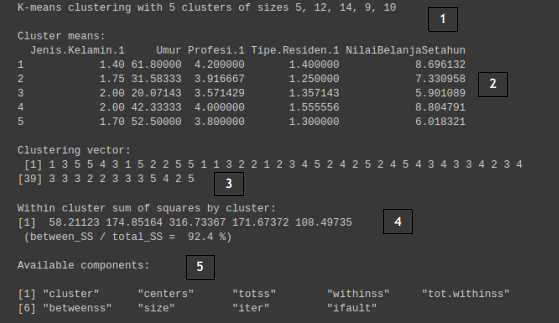

Hasil ini dapat dibagi dalam lima bagian, dengan penjelasan sesuai nomor urut pada gambar sebagai berikut:

1. Ukuran / jumlah titik data pada tiap cluster
2. Nilai rata-rata (centroid) dari tiap cluster
3. Pembagian cluster dari tiap elemen data berdasarkan posisinya
4. Jumlah jarak kuadrat dari tiap titik ke centroidnya
5. Komponen informasi lain yang terkandung di dalam objek kmeans ini

**Penggabungan hasil cluster**

In [ ]:
segmentasi$cluster
# Menggabungkan Segmentasi yang sudah dibuat ke dalam data frame Pelanngan
pelanggan$cluster <- segmentasi$cluster
str(pelanggan)

[1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

'data.frame':	50 obs. of  11 variables:
 $ Customer_ID        : chr  "CUST-001" "CUST-002" "CUST-003" "CUST-004" ...
 $ Nama.Pelanggan     : chr  "Budi Anggara" "Shirley Ratuwati" "Agus Cahyono" "Antonius Winarta" ...
 $ Jenis.Kelamin      : chr  "Pria" "Wanita" "Pria" "Pria" ...
 $ Umur               : int  58 14 48 53 41 24 64 52 29 33 ...
 $ Profesi            : chr  "Wiraswasta" "Pelajar" "Professional" "Professional" ...
 $ Tipe.Residen       : chr  "Sector" "Cluster" "Cluster" "Cluster" ...
 $ NilaiBelanjaSetahun: num  9.5 2.72 5.29 5.2 10.62 ...
 $ Jenis.Kelamin.1    : int  1 2 1 1 2 2 1 1 2 1 ...
 $ Profesi.1          : int  5 3 4 4 5 4 5 4 4 4 ...
 $ Tipe.Residen.1     : int  2 1 1 1 1 1 2 1 2 1 ...
 $ cluster            : int  1 3 5 5 4 3 1 5 2 2 ...


In [ ]:
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1,cluster
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927,1,5,2,1
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2.722700,2,3,1,3
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5.286429,1,4,1,5
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5.204498,1,4,1,5
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10.615206,2,5,1,4
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5.215541,2,4,1,3


Menyamakan hasil cluster dan jumlah di dalam cluster tersebut

In [ ]:
#Analisa hasil
#Filter cluster ke-1
which(pelanggan$cluster == 1)
length(which(pelanggan$cluster == 1))

[1]  1  7 13 14 18

[1] 5

`which(pelanggan$cluster == 1):`

Fungsi which() digunakan untuk menemukan indeks dari elemen yang memenuhi kondisi tertentu. Dalam hal ini, kita mencari indeks dari baris-baris dalam data frame pelanggan di mana kolom cluster sama dengan 1.

output dari `which(pelanggan$cluster == 1)`:

 adalah 1, 7, 13, 14, 18 dan 5, ini berarti bahwa pelanggan yang berada di baris ke-1, ke-7, ke-13, ke-14, ke-18, dan ke-5 dalam data frame pelanggan termasuk dalam cluster ke-1.



**Analisa Hasil Sum of Squares**

Konsep sum of squares (SS) adalah jumlah "jarak kuadrat" perbedaan tiap titik data dengan mean atau centroidnya. SS ini bisa dengan mean atau centroid untuk tiap cluster atau secara keseluruhan data. Sum of squares dalam literatur data science lain sering disebut dengan Sum of Squared Errors (SSE).

Semakin besar nilai SS menyatakan semakin lebarnya perbedaan antar tiap titik data di dalam cluster tersebut.

Berdasarkan konsep tersebut, berikut adalah penjelasan untuk hasil output kmeans di atas:

- SS: Semakin kecil nilainya berpotensi semakin baik.
- total_SS: adalah SS untuk seluruh titik terhadap nilai rata-rata global, bukan untuk per cluster. Nilai ini selalu tetap dan tidak terpengaruh dengan jumlah cluster.
- between_SS: adalah total_SS dikurangi dengan jumlah nilai SS seluruh cluster.
- (between_SS / total_SS) adalah rasio antara between_SS dibagi dengan total_SS. Semakin besar persentasenya, ummnya semakin baik.



In [ ]:
#Membandingkan dengan 2 cluster kmeans, masing-masing 2 dan 5
set.seed(100)
kmeans(x=pelanggan[field_yang_digunakan], centers=2, nstart=25)
set.seed(100)
kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)


K-means clustering with 2 clusters of sizes 23, 27

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1        1.739130 51.17391  3.913043       1.434783            7.551518
2        1.888889 25.85185  3.777778       1.296296            6.659586

Clustering vector:
 [1] 1 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 2 1 2 2 1
[39] 2 2 2 2 2 2 2 2 1 1 2 1

Within cluster sum of squares by cluster:
[1] 1492.481 1524.081
 (between_SS / total_SS =  72.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

Within cluster sum of squares by cluster:
[1]  58.21123 174.85164 316.73367 171.67372 108.49735
 (between_SS / total_SS =  92.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

terlihat untuk 2 cluster (k=2), SS per cluster lebih besar dibandingkan jika data dibagi menjadi 5 cluster (k=5). Perhatikan juga persentase rasio antara between_SS dan total_SS, dimana k=5 juga lebih besar.

sehingga membagi menjadi 5 cluster adalah pilihan yang tepat dibandingkan menjadi 2 cluster

Dari informasi yang dihasilkan oleh function kmeans, metrick Sum of Squares (SS) atau sering disebut Sum of Squared Errors (SSE) sangat penting untuk dijadikan dasar kita menentukan jumlah cluster yang paling optimal.

Secara teoritis, berikut adalah beberapa hal yang bisa kita amati dengan SS:

- Semakin sedikit jumlah cluster yang dihasilkan maka semakin besar nilai SS.
- Begitu juga sebaliknya, semakin banyak jumlah cluster yang dihasilkan maka semakin kecil nilai SS nya.
- Karena sifatnya kuadratik, jika terdapat perbedaan yang cukup signifikan antara tiap kombinasi cluster maka perbedaan nilai SS akan semakin besar.
- Dan seiring bertambahnya jumlah cluster, perbedaan tiap SS ini akan semakin kecil.



**Simulasi Jumlah Cluster dan SS**

Metrik elbow method yang digunakan sebagai basis justifikasi adalah Sum of Squares (SS), atau lebih tepatnya komponen tot.withinss dari objek kmeans.

Metrik ini akan dicari progressive nilai tot.withinss untuk tiap kombinasi jumlah cluster, dan disimpan dalam bentuk vector di R.

Untuk keperluan ini, kita akan gunakan sapply. Function sapply akan digunakan untuk memanggil function kmeans untuk suatu range jumlah cluster. Range ini akan kita gunakan 1 sampai dengan 10.

In [ ]:
#Bagian K-Means
set.seed(100)
sse <- sapply(1:10,
function(param_k)
  {
kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss
}
)
sse

[1] 10990.9740  3016.5612  1550.8725  1064.4187   829.9676   625.1462
 [7]   508.1568   431.6977   374.1095   317.9424

`kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss:`

- `kmeans()` untuk melakukan clustering pada data pelanggan.
- `pelanggan[field_yang_digunakan]:` Ini merujuk pada subset dari data frame `pelanggan` yang berisi kolom-kolom yang relevan untuk analisis.
- `param_k:` Ini adalah jumlah cluster yang sedang diuji.
- `nstart=25:` Ini menunjukkan bahwa algoritma K-Means akan dijalankan dengan 25 inisialisasi acak yang berbeda untuk mendapatkan hasil yang optimal.
-* $tot.withinss:* Setelah menjalankan K-Means, kita mengambil nilai tot.withinss, yang merupakan total within-cluster sum of squares (SSE) untuk model yang dihasilkan. Ini adalah ukuran seberapa baik data dikelompokkan dalam cluster.

**sse:**

Setelah sapply() selesai, variabel sse akan berisi vektor yang berisi nilai SSE untuk setiap jumlah cluster dari 1 hingga 10. kita dapat menggunakan nilai-nilai ini untuk menganalisis seberapa baik clustering dilakukan untuk berbagai jumlah cluster.

**Grafik Elbow Effect**

Kali ini kita akan visualisasikan vector Sum of Squares (SS) atau Sum of Squared Errors (SSE) yang telah kita hasilkan pada praktek sebelumnya.

Kita akan gunakan ggplot untuk visualisasi, datasetnya berupa penggabungan data frame dari sse dan range nilai 1:10, dengan perintah berikut.

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


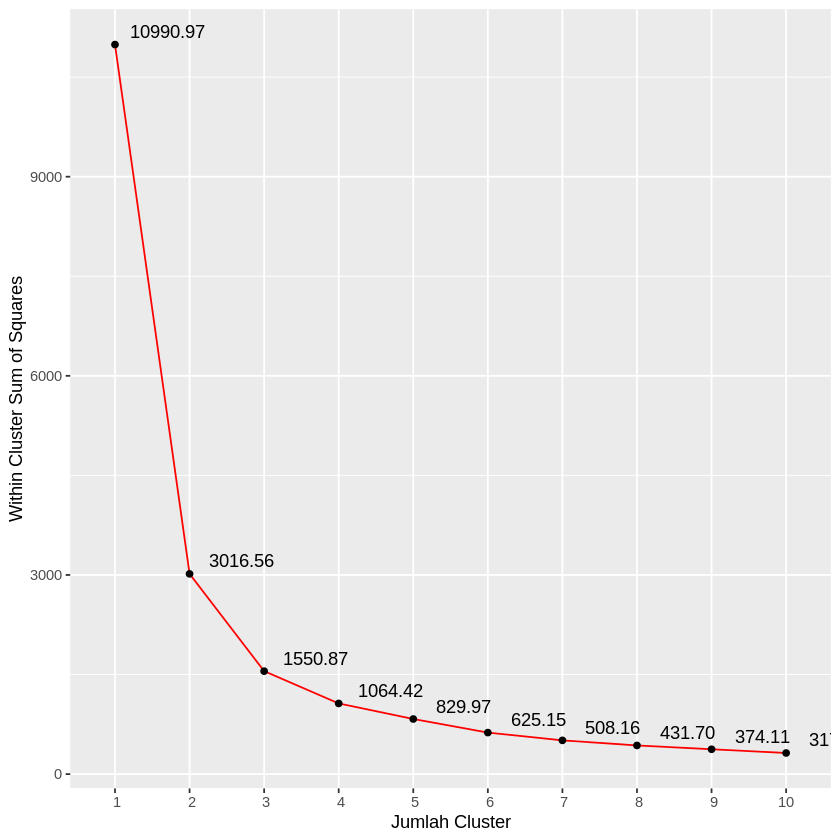

In [ ]:
library(ggplot2)

jumlah_cluster_max <- 10
ssdata = data.frame(cluster=c(1:jumlah_cluster_max),sse)
ggplot(ssdata, aes(x=cluster,y=sse)) +
                geom_line(color="red") + geom_point() +
                ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
                geom_text(aes(label=format(round(sse, 2), nsmall = 2)),hjust=-0.2, vjust=-0.5) +
  scale_x_discrete(limits=c(1:jumlah_cluster_max))

Terlihat jika jumlah cluster optimal yang bisa kita gunakan adalah 5, dan ini menjadi keputusan kita sebagai jumlah segmentasi pelanggan.

In [ ]:
pelanggan

Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1,cluster,x
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>
CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927,1,5,2,1,1
CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2.722700,2,3,1,3,3
CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5.286429,1,4,1,5,5
CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5.204498,1,4,1,5,5
CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10.615206,2,5,1,4,4
CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5.215541,2,4,1,3,3
CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9.837260,1,5,2,1,1
CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5.223569,1,4,1,5,5
CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5.993218,2,4,2,2,2


untuk menentukan nama segmen

In [ ]:
bar <- subset(pelanggan, cluster == 5)
mean(bar$Umur)
bar

[1] 42.33333

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1,cluster,x
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10.615206,2,5,1,4,4
21,CUST-021,Lestari Fabianto,Wanita,38,Wiraswasta,Cluster,9.222070,2,5,1,4,4
24,CUST-024,Putri Ginting,Wanita,39,Wiraswasta,Cluster,10.259572,2,5,1,4,4
28,CUST-028,Adeline Huang,Wanita,40,Ibu Rumah Tangga,Cluster,6.631680,2,1,1,4,4
30,CUST-030,Rosita Saragih,Wanita,46,Ibu Rumah Tangga,Sector,5.020976,2,1,2,4,4
32,CUST-032,Chintya Winarni,Wanita,47,Wiraswasta,Sector,10.663179,2,5,2,4,4
35,CUST-035,Ida Ayu,Wanita,39,Professional,Sector,5.962575,2,4,2,4,4
38,CUST-038,Agatha Salim,Wanita,46,Wiraswasta,Sector,10.477127,2,5,2,4,4
48,CUST-048,Maria Hutagalung,Wanita,45,Wiraswasta,Sector,10.390732,2,5,2,4,4


**Menamakan Segmen**

Mari kita coba namakan cluster 1 s/d 5 sebagai berikut:

- Cluster  1 : Diamond Senior Member: alasannya adalah karena umurnya rata-rata adalah 61 tahun dan pembelanjaan di atas 8 juta.
- Cluster 2 : Gold Young Professional: alasannya adalah karena umurnya rata-rata adalah 31 tahun, professional dan pembelanjaan cukup besar.
- Cluster  3 : Silver Youth Gals: alasannya adalah karena umurnya rata-rata adalah 20, wanita semua, profesinya bercampur antar pelajar dan professional serta pembelanjaan sekitar 6 juta.
- Cluster 4 : Diamond Profesional: alasannya adalah karena umurnya rata-rata adalah 42 tahun.
- Cluster 5 : Silver Mid Professional: alasannya adalah karena umurnya rata-rata adalah 52 tahun dan pembelanjaan sekitar 6 juta.

Kita akan masukkan ini sebagai named vector pada praktek berikut.


In [ ]:
Segmen.Pelanggan <- data.frame(cluster=c(1,2,3,4,5), nama.segmen=c("Diamond Senior Member", "Gold Young Professional", "Silver Youth Gals", "Diamond Profesional",  "Silver Mid Professional"))

In [ ]:
Segmen.Pelanggan

cluster,nama.segmen
<dbl>,<chr>
1,Diamond Senior Member
2,Gold Young Professional
3,Silver Youth Gals
4,Diamond Profesional
5,Silver Mid Professional


**Menggabungkan Referensi**

Sejauh ini kita telah membentukan aset-aset data sebagai berikut:

- Dataset pelanggan yang telah "diperkaya" dengan tambahan kolom hasil konversi teks menjadi numerik, dan menormalisasikan field NilaiBelanjaSetahun.
- Objek kmeans dengan k=5, dipilih berdasarkan metodologi menggunakan metrik Sum of Squares (SS).
- Membuat variable referensi atau pemetaan numerik dan teks asli (kategori) dari kolom Jenis Kelamin, Profesi dan Tipe Residen.
- Variable data.frame dengan nama Pelanggan yang berisi penamaan cluster sesuai analisa karakteristik dari centroid kolom-kolom pelanggan yang digunakan.
- Vector dari field yang digunakan.

Akan sangat baik jika semuanya digabungkan di satu variable dengan tipe list, dan ini akan jadi model kita yang dapat disimpan ke dalam file dan digunakan ketika diperlukan.


In [ ]:
Identitas.Cluster <- list(Profesi=Profesi, Jenis.Kelamin=Jenis.Kelamin, Tipe.Residen=Tipe.Residen, Segmentasi=segmentasi, Segmen.Pelanggan=Segmen.Pelanggan, field_yang_digunakan=field_yang_digunakan)

In [ ]:
Identitas.Cluster

$Profesi
            Profesi Profesi.1
1        Wiraswasta         5
2           Pelajar         3
3      Professional         4
17 Ibu Rumah Tangga         1
31        Mahasiswa         2

$Jenis.Kelamin
  Jenis.Kelamin Jenis.Kelamin.1
1          Pria               1
2        Wanita               2

$Tipe.Residen
  Tipe.Residen Tipe.Residen.1
1       Sector              2
2      Cluster              1

$Segmentasi
K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4

**Menyimpan Objek dalam Bentuk File**

Objek yang sudah digabungkan pada praktek sebelumnya sudah memiliki semua aset yang diperlukan untuk mengalokasikan data baru ke segmen yang sesuai.

In [ ]:
saveRDS(Identitas.Cluster,"cluster.rds")

**Data Baru**

Pada teks sebelumnya, disebutkan data pelanggan baru harus cepat dipetakan ke segmen.

Dengan asumsi tiap data pelanggan baru diinput ke dalam sistem, maka pengolahan adalah per record. Pada praktek kali ini, kita akan membuat data.frame dengan satu data dimana nama-nama kolomnya persis dengan dataset awal.

In [ ]:
databaru <- data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Umur=20,Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)
databaru

Customer_ID,Nama.Pelanggan,Umur,Jenis.Kelamin,Profesi,Tipe.Residen,NilaiBelanjaSetahun
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
CUST-100,Rudi Wilamar,20,Wanita,Pelajar,Cluster,3.5


**Memuat Objek Clustering dari File**

Praktek kali ini adalah membuka file yang telah kita simpan sebelumnya dengan perintah dan dikenali di R sebagai objek yang akan kita gunakan untuk mengolah data baru.

Untuk membuka file tersebut, kita gunakan function readRDS.

In [ ]:
Identitas.Cluster <- readRDS(file="cluster.rds")
Identitas.Cluster

$Profesi
            Profesi Profesi.1
1        Wiraswasta         5
2           Pelajar         3
3      Professional         4
17 Ibu Rumah Tangga         1
31        Mahasiswa         2

$Jenis.Kelamin
  Jenis.Kelamin Jenis.Kelamin.1
1          Pria               1
2        Wanita               2

$Tipe.Residen
  Tipe.Residen Tipe.Residen.1
1       Sector              2
2      Cluster              1

$Segmentasi
K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4

**Merge dengan Data Referensi**

Dengan adanya data baru dan objek yang berisi data referensi telah dibaca kembali, kita bisa menggabungkan data baru ini untuk mendapatkan konversi numerik dari field Jenis.Kelamin, Profesi dan Tipe.Residen.

Tujuannya adalah kita akan bisa mencari segmen pelanggannya dengan data numerik hasil penggabungan.

Cara menggabungkannya adalah dengan menggunakan function merge, dimana kedua data akan digabungkan dengan mencari persamaan nama kolom dan isinya.

In [ ]:
databaru <- merge(databaru, Identitas.Cluster$Profesi)
databaru <- merge(databaru, Identitas.Cluster$Jenis.Kelamin)
databaru <- merge(databaru, Identitas.Cluster$Tipe.Residen)

In [ ]:
databaru

Tipe.Residen,Jenis.Kelamin,Profesi,Customer_ID,Nama.Pelanggan,Umur,NilaiBelanjaSetahun,Profesi.1,Jenis.Kelamin.1,Tipe.Residen.1
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
Cluster,Wanita,Pelajar,CUST-100,Rudi Wilamar,20,3.5,3,2,1



 - Variable databaru dengan Identitas.Cluster$Profesi memiliki nama kolom yang sama, yaitu Profesi.
- Kolom Profesi kemudian akan dijadikan "kunci" untuk menggabungkan kedua variable ini.
- Ternyata isi Profesi dari databaru, yaitu "Pelajar" juga terdapat di Identitas.Cluster. Ini akan membuat penggabungan menjadi berhasil.
- Penggabungan ini juga akan mengambil kolom Profesi.1 dan isi data yang terkait dengan Pelajar, yaitu nilai 3.


**Menentukan Cluster**

Kini saatnya penentuan untuk melakukan praktek terpenting bagi bisnis: data baru ini masuk ke segmen mana?

Gampang!

Yaitu dengan tahapan berikut:

mencari jarak kuadrat minimum atau terdekat dari kolom numerik data baru tersebut ke centroid kolom terkait dari seluruh cluster yang ada


In [ ]:
Identitas.Cluster$Segmen.Pelanggan[which.min(sapply( 1:5, function( x ) sum( ( databaru[Identitas.Cluster$field_yang_digunakan] - Identitas.Cluster$Segmentasi$centers[x,])^2 ) )),]

,cluster,nama.segmen
,<dbl>,<chr>
3,3,Silver Youth Gals
